In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score, confusion_matrix, mean_squared_error
from sklearn.linear_model import LassoCV

In [3]:
def split_x_y(fname):
    X, y = pd.read_csv(fname), []
    try:
        y = X['digit']
        del X['digit']
    finally:
        return X, y
        
x_train, y_train = split_x_y('digits_train.csv')
x_valid, y_valid = split_x_y('digits_valid.csv')
# x_test, y_test = split_x_y('digits_test.csv')

# for i in range(10):
#     grid = x_train.loc[i, :].values.reshape((16, 16))
#     plt.title('Row: {:d} | Digit: {:d}'.format(i, y_train.values[i]))
#     plt.imshow(grid)
#     plt.show()
# 
# def plot_conf_mat(matrix):
#     fig = plt.figure()
#     plt.clf()
#     ax = fig.add_subplot(111)
#     ax.set_aspect(1)
#     grid = plt.imshow(matrix, interpolation='nearest')
#     cb = fig.colorbar(grid)
#     plt.show()

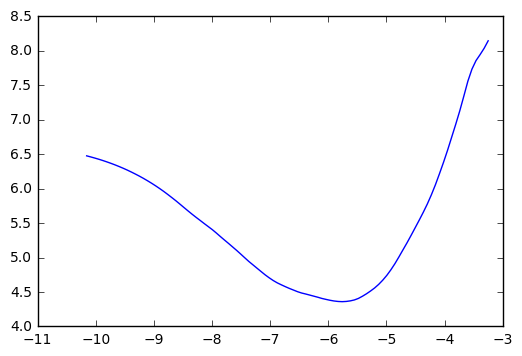

-5.76157167044


In [11]:
selector = LassoCV(n_alphas=100, normalize=True, cv=10)
selector.fit(x_train, y_train)
plt.plot(np.log(selector.alphas_), [folds.mean() for folds in selector.mse_path_])
plt.show()
print(np.log(selector.alpha_))